In [19]:
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import statsmodels.api as sn

In [20]:
df=pd.read_csv('housing_price.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [21]:
df.drop(columns=['id'],inplace=True)

In [22]:
def unistats(df):
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Mean', 'Mode', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurtosis'])

    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):  # Проверка типа данных
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype,
                                   df[col].mean(), df[col].mode().iloc[0], df[col].min(), df[col].quantile(0.25),
                                   df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std(),
                                   df[col].skew(), df[col].kurtosis()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype,
                                   '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

    return output_df


In [23]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
unistats(df) #тут у нас проблема с skew и kurtosis

,Count,Missing,Unique,Dtype,Mean,Mode,Min,25%,Median,75%,Max,Std,Skew,Kurtosis
date,21613,0,372,object,-,-,-,-,-,-,-,-,-,-
price,21613,0,4028,float64,540088.141767,350000.0,75000.0,321950.0,450000.0,645000.0,7700000.0,367127.196483,4.024069,34.58554
bedrooms,21613,0,13,int64,3.370842,3,0,3.0,3.0,4.0,33,0.930062,1.9743,49.063653
bathrooms,21613,0,30,float64,2.114757,2.5,0.0,1.75,2.25,2.5,8.0,0.770163,0.511108,1.279902
sqft_living,21613,0,1038,int64,2079.899736,1300,290,1427.0,1910.0,2550.0,13540,918.440897,1.471555,5.243093
sqft_lot,21613,0,9782,int64,15106.967566,5000,520,5040.0,7618.0,10688.0,1651359,41420.511515,13.060019,285.07782
floors,21613,0,6,float64,1.494309,1.0,1.0,1.0,1.5,2.0,3.5,0.539989,0.616177,-0.484723
waterfront,21613,0,2,int64,0.007542,0,0,0.0,0.0,0.0,1,0.086517,11.385108,127.632494
view,21613,0,5,int64,0.234303,0,0,0.0,0.0,0.0,4,0.766318,3.39575,10.893022
condition,21613,0,5,int64,3.40943,3,1,3.0,3.0,4.0,5,0.650743,1.032805,0.525764


In [42]:
stats.f_oneway(df['lat'],df['floors'],df['long'])


F_onewayResult(statistic=1511670965.7330253, pvalue=0.0)

In [35]:
def bivstats(df,label):
    from scipy import stats
    import pandas as pd
    corr_df=pd.DataFrame(columns=['r','F','X2','p-value'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            r,p=stats.pearsonr(df[label],df[col])
            corr_df.loc[col]=[round(r,4),'-','-',p]
        

    corr_df=corr_df.sort_values(by=['r'],ascending=False) 

    
    return corr_df


In [36]:
corr_df=bivstats(df,'floors')

In [37]:
corr_df

,r,F,X2,p-value
floors,1.0000,-,-,0.000000e+00
sqft_above,0.5239,-,-,0.000000e+00
bathrooms,0.5007,-,-,0.000000e+00
yr_built,0.4893,-,-,0.000000e+00
grade,0.4582,-,-,0.000000e+00
sqft_living,0.3539,-,-,0.000000e+00
sqft_living15,0.2799,-,-,0.000000e+00
price,0.2568,-,-,1.581010e-322
bedrooms,0.1754,-,-,6.301693e-149
long,0.1254,-,-,1.703400e-76


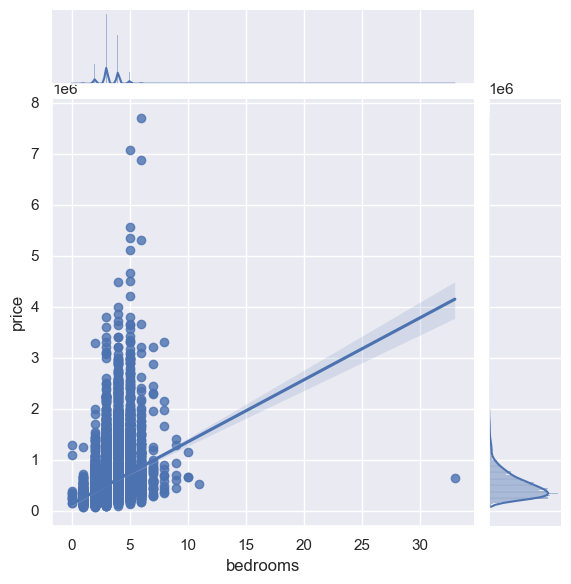

In [46]:
def scatter(df,feature,label):
    import seaborn as sns
    from scipy import stats
    sns.set(color_codes=True)
    sns.jointplot(x=feature,y=label,data=df,kind='reg')


scatter(df,'bedrooms','price')